# Task 2 б) 
## Made by Igor Sokolov from 476 group


Solve this stiff problem

$$y'(t)=50(cost-y^3(t)), \hspace{10mm} 0\leq t\leq 20$$
$$y(0)=0$$

using Diagonal-implicit method

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
%matplotlib inline

Неявный Эйлер, всего шагов: 470, отброшено: 47


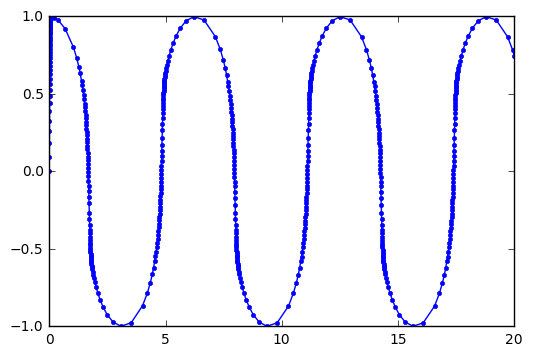

In [9]:

def func_f(t, y, jac=False):
    if jac:
        return (-50.0 * (3.0 * y ** 2))
    return 50.0 * (math.cos(t) - y ** 3)


def newton(F, dFdx, x0):
    #print "F, dFdx ", F, dFdx
    #raw_input()
    x1 = x0
    x2 = x1
    x_list = []
    x_list.append(x1)
    for it in range(100):
        x2 = x1
        x1 = x1 - F(x1)/dFdx(x1)
        dx = abs(x2-x1)
        x_list.append(x1)

        if dx < 1e-12:
            return x1
    #print('Максимальное число итераций превышено!')
    return x1


# Добавим вычисление производной, необходимой для метода Ньютона

def imeuler(f, h, t, u):
   #E = np.eye(len(u))

    # print "t, u =", t, u
    k1 = newton(
        lambda k: k - f(t + h, u + h * k),  # Уравнение k-f(t+h,u+h*k) = 0
        lambda k: 1 - h * f(t + h, u + h * k, jac=True),  # Производная по k
        f(t, u))  # Начальное приближение
    return u + h * k1

imeuler.order = 1
imeuler.name = 'Неявный Эйлер'


def fixed_stepsize(f, y0, tmax, method, tau=0.1):
    t = 0; u = y0
    T = [0]; Y = [y0]
    name = method.name
    while t < tmax:
        # Если последний шаг выхдит за tmax - уменьшаем tau
        if t + tau > tmax: tau = tmax - t
        u = method(f, tau, t, u)
        t += tau;
        T.append(t)
        Y.append(u)
    print('%s, всего шагов: %d'%(name, len(T)-1))
    return np.array(T), np.array(Y)


def adaptive_stepsize(f, y0, tmax, method, tol, tau=0.1):
    t = 0
    u = y0
    T = [0]
    Y = [y0]
    p = method.order
    name = method.name
    failed = 0  # Число неудачных шагов
    while t < tmax:
        if t + tau > tmax: tau = tmax - t
        u1 = method(f, tau, t, u)  # Целый шаг
        u2 = method(f, tau / 2.0, t, u)
        u2 = method(f, tau / 2.0, t + tau / 2.0, u2)  # Два полушага
        err = np.linalg.norm(u1 - u2) / (1 - 2.0 ** -p)  # Правило Рунге
        fac = (tol / err) ** (1.0 / (p + 1))  # Подстраиваем tau
        taunew = tau * min(2, max(0.25, 0.8 * fac))
        if err < tol:  # Ошибка мала, принимаем шаг
            t += tau;
            u = u1
            T.append(t);
            Y.append(u)
        else:  # Если ошибка велика, повторяем шаг с новым tau
            failed += 1
        tau = taunew
    print('%s, всего шагов: %d, отброшено: %d' % (name, len(T) - 1, failed))
    return np.array(T), np.array(Y)


tmax = 20
problem_init = 0
T, Y = adaptive_stepsize(func_f, problem_init, tmax, imeuler, 1e-3)
#T, Y = fixed_stepsize(func_f, problem_init, tmax, imeuler, 1e-1)

plt.plot(T,Y,'.-')
plt.show()
